In [1]:
from tensorflow.keras import datasets , layers, models 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import cv2
import os.path
import zipfile
import os
import matplotlib.pyplot as plt 
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-27 15:35:43.110952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 15:35:43.111089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 15:35:43.266745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
!pip install py7zr

In [3]:
import py7zr

##START OF DATA PROCESSING

In [5]:
##loading images from 7z file to a working directory ready to be accessed.
import shutil
from py7zr import unpack_7zarchive

shutil.register_unpack_format('7zip',['.7z'],unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/invasive-species-monitoring/train.7z', '/kaggle/working/')


In [ ]:
shutil.unpack_archive('/kaggle/input/invasive-species-monitoring/test.7z','/kaggle/working/')

In [6]:
##loading the labels of the training images.
df_zip = zipfile.ZipFile("../input/invasive-species-monitoring/train_labels.csv.zip")
train_x_labels = pd.read_csv(df_zip.open('train_labels.csv'))
print(train_x_labels['invasive'].unique())



[0 1]


In [7]:
##apending image path to labels
def append_ext(fn):
    return "/kaggle/working/train/"+fn+".jpg"
traindf=pd.read_csv(df_zip.open('train_labels.csv'), dtype=str)
traindf["name"]=traindf["name"].apply(append_ext)

                                name invasive
0        /kaggle/working/train/1.jpg        0
1        /kaggle/working/train/2.jpg        0
2        /kaggle/working/train/3.jpg        1
3        /kaggle/working/train/4.jpg        0
4        /kaggle/working/train/5.jpg        1
...                              ...      ...
2290  /kaggle/working/train/2291.jpg        1
2291  /kaggle/working/train/2292.jpg        1
2292  /kaggle/working/train/2293.jpg        1
2293  /kaggle/working/train/2294.jpg        1
2294  /kaggle/working/train/2295.jpg        1

[2295 rows x 2 columns]


In [8]:
print(len(traindf))
print(traindf)

2295
                                name invasive
0        /kaggle/working/train/1.jpg        0
1        /kaggle/working/train/2.jpg        0
2        /kaggle/working/train/3.jpg        1
3        /kaggle/working/train/4.jpg        0
4        /kaggle/working/train/5.jpg        1
...                              ...      ...
2290  /kaggle/working/train/2291.jpg        1
2291  /kaggle/working/train/2292.jpg        1
2292  /kaggle/working/train/2293.jpg        1
2293  /kaggle/working/train/2294.jpg        1
2294  /kaggle/working/train/2295.jpg        1

[2295 rows x 2 columns]


In [9]:
##Using image data generator method to process images in batches
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [10]:
train_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=None,
    x_col="name",
    y_col="invasive",
    subset="training",
    batch_size=128,
    shuffle=False,
    class_mode="binary",
    target_size=(128,128))

Found 1836 validated image filenames belonging to 2 classes.


In [ ]:
##Optional Code to visualize images pulled from batches in the data generator
x = 0
for batch in train_generator:
    images = batch[0]
    labels = batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    
    x += 1
    if x == 2:
        break


In [11]:
valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=None,
    x_col="name",
    y_col="invasive",
    subset="validation",
    batch_size=128,
    shuffle=True,
    class_mode="binary",
    target_size=(128,128))

Found 459 validated image filenames belonging to 2 classes.


##END OF DATA PROCESSING STEPS

##BUILDING DEEP LEARNING MODEL

In [12]:
input_shape = (128,128,3)
model = tf.keras.Sequential()

layers.BatchNormalization(input_shape=input_shape)

layers.BatchNormalization()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
layers.Dropout(0.3)


layers.BatchNormalization()
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
layers.Dropout(0.3)


layers.BatchNormalization()
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
layers.Dropout(0.3)

layers.BatchNormalization()
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
layers.Dropout(0.3)

layers.BatchNormalization()
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
layers.Dropout(0.3)


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [14]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history = model.fit(x=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
14/14 [==============================] - 84s 6s/step - loss: 0.6647 - accuracy: 0.6230 - val_loss: 0.6098 - val_accuracy: 0.6510
Epoch 2/10
14/14 [==============================] - 69s 5s/step - loss: 0.6028 - accuracy: 0.6382 - val_loss: 0.5816 - val_accuracy: 0.7031
Epoch 3/10
14/14 [==============================] - 69s 5s/step - loss: 0.5635 - accuracy: 0.7149 - val_loss: 0.4983 - val_accuracy: 0.7214
Epoch 4/10
14/14 [==============================] - 98s 7s/step - loss: 0.4921 - accuracy: 0.7570 - val_loss: 0.5127 - val_accuracy: 0.7240
Epoch 5/10
14/14 [==============================] - 72s 5s/step - loss: 0.4518 - accuracy: 0.7881 - val_loss: 0.4681 - val_accuracy: 0.7786
Epoch 6/10
14/14 [==============================] - 68s 5s/step - loss: 0.3797 - accuracy: 0.8326 - val_loss: 0.3958 - val_accuracy: 0.8385
Epoch 7/10
14/14 [==============================] - 68s 5s/step - loss: 0.3840 - accuracy: 0.8308 - val_loss: 0.3926 - val_accuracy: 0.8255
Epoch 8/10
14/14 [==

In [16]:
print(model.history)

In [19]:
print(history.history['loss'])

[0.6646850109100342, 0.6028398871421814, 0.5635095834732056, 0.4920947253704071, 0.4518498480319977, 0.3796837627887726, 0.38396763801574707, 0.31545668840408325, 0.2941330373287201, 0.2834746837615967]


<Axes: title={'center': 'Accuracy'}>

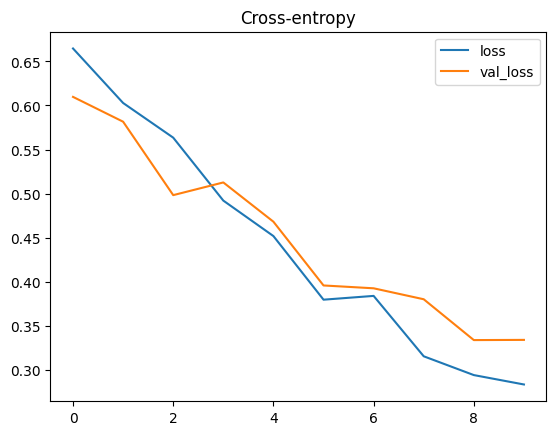

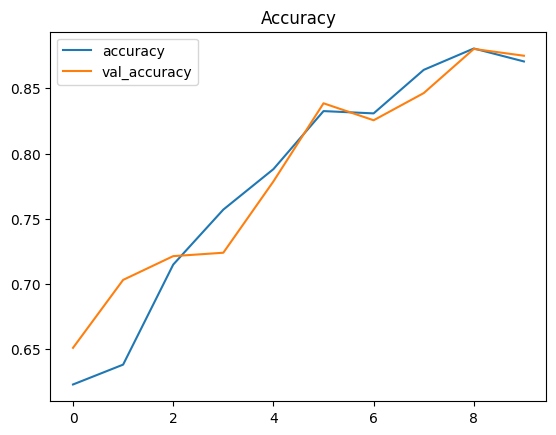

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)